In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
gasturbines_data= pd.read_csv('gas_turbines.csv')
gasturbines_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gasturbines_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
gasturbines_data.shape

(15039, 11)

In [5]:
gasturbines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


No null entries/values in the data.

Checking Missing Values:-

In [6]:
gasturbines_data[gasturbines_data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


Visualzing the data on the graph/plots:-

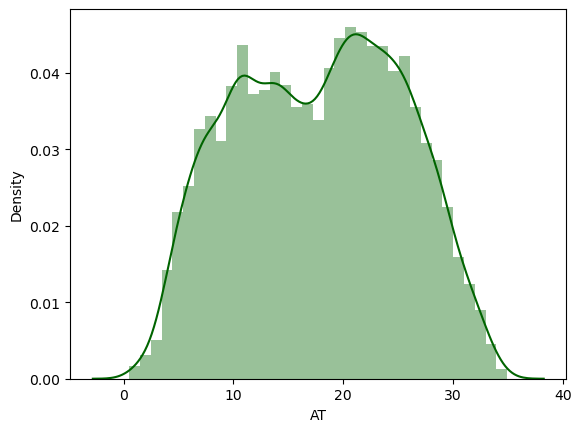

In [7]:
sns.distplot(gasturbines_data['AT'], color = 'darkgreen')
plt.show()

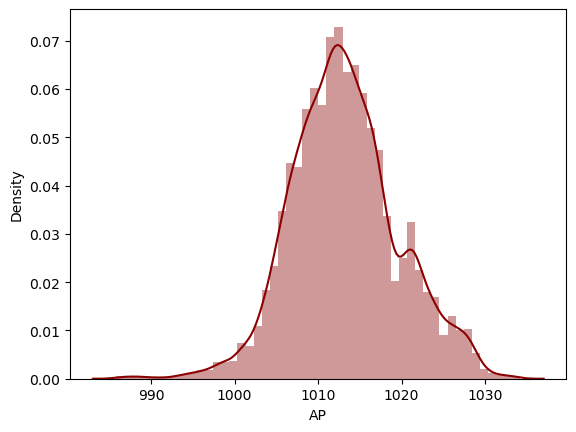

In [8]:
sns.distplot(gasturbines_data['AP'], color = 'darkred')
plt.show()

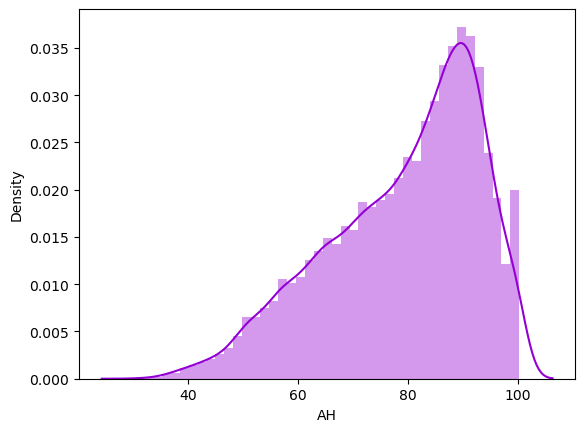

In [9]:
sns.distplot(gasturbines_data['AH'], color = 'darkviolet')
plt.show()

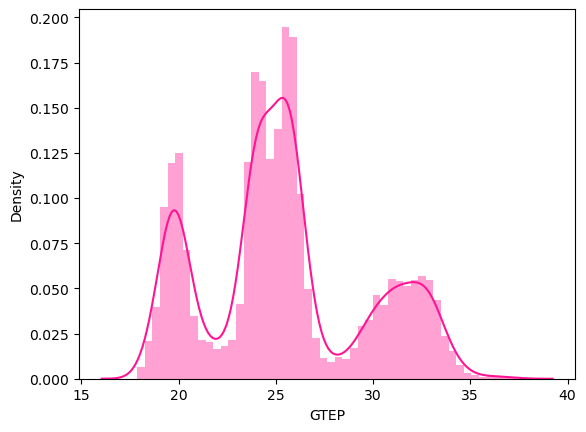

In [10]:
sns.distplot(gasturbines_data['GTEP'], color = 'deeppink')
plt.show()

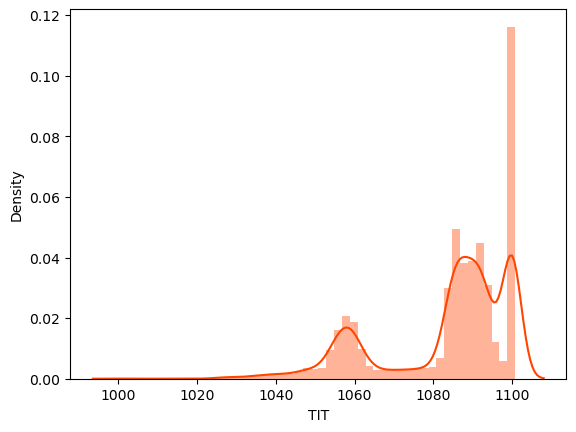

In [11]:
sns.distplot(gasturbines_data['TIT'], color = 'orangered')
plt.show()


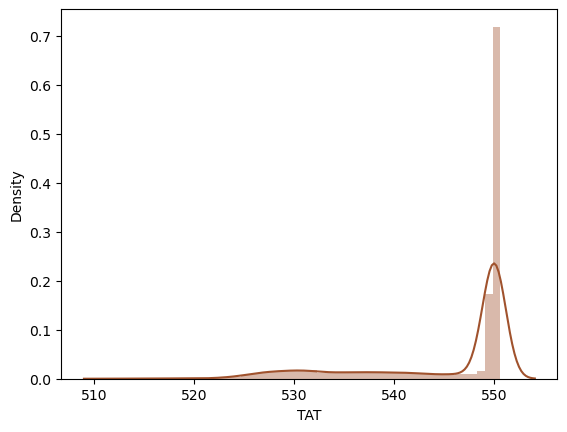

In [12]:
sns.distplot(gasturbines_data['TAT'], color = 'sienna')
plt.show()

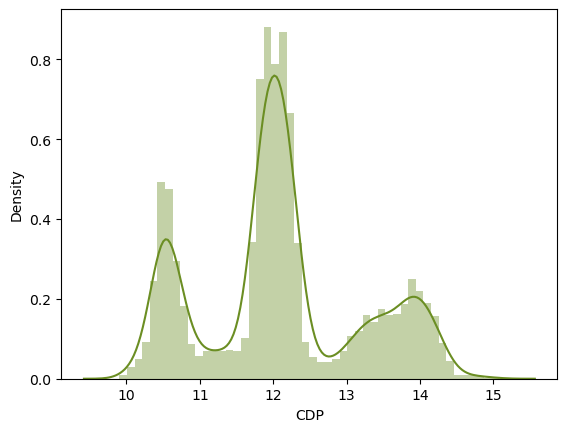

In [13]:
sns.distplot(gasturbines_data['CDP'], color = 'olivedrab')
plt.show()


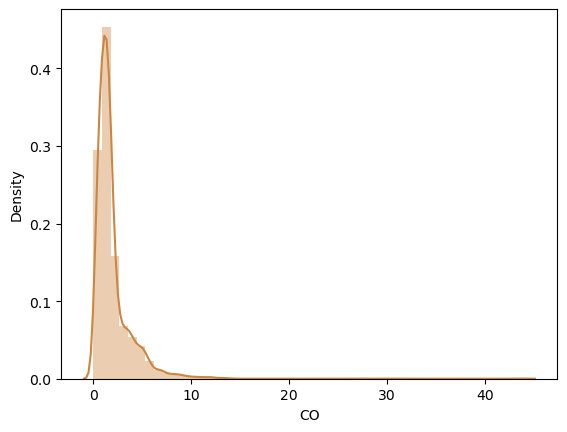

In [14]:
sns.distplot(gasturbines_data['CO'], color = 'peru')
plt.show()

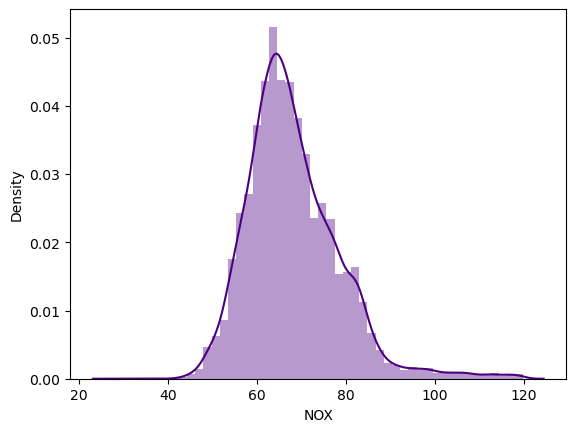

In [15]:
sns.distplot(gasturbines_data['NOX'], color = 'indigo')
plt.show()

Splitting Independent and Dependent Variables:-

In [17]:
y=gasturbines_data["TEY"]

Taking Ambient Variables as Independent Variables:-

In [19]:
 x=gasturbines_data.iloc[:,:3]

In [21]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [23]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [24]:
x1=x.values

In [25]:
x1

array([[   6.8594, 1007.9   ,   96.799 ],
       [   6.785 , 1008.4   ,   97.118 ],
       [   6.8977, 1008.8   ,   95.939 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 ],
       [   7.006 , 1006.8   ,   99.008 ],
       [   6.9279, 1007.2   ,   97.533 ]])

In [26]:
y1=y.values

In [27]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

Building the Model:-

Use the Mean Squared Error as the Loss Function:-

In [28]:
model=Sequential()
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))

In [31]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
 history=model.fit(x1,y1,validation_split=0.33,epochs=250,batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 3s 2ms/step - loss: 291.2986 - val_loss: 226.0864
Epoch 2/250
1008/1008 [==============================] - 1s 1ms/step - loss: 245.0854 - val_loss: 219.1765
Epoch 3/250
1008/1008 [==============================] - 1s 1ms/step - loss: 240.0340 - val_loss: 218.6987
Epoch 4/250
1008/1008 [==============================] - 1s 1ms/step - loss: 235.7068 - val_loss: 219.2187
Epoch 5/250
1008/1008 [==============================] - 1s 1ms/step - loss: 233.1925 - val_loss: 228.1015
Epoch 6/250
1008/1008 [==============================] - 2s 2ms/step - loss: 230.9962 - val_loss: 235.2118
Epoch 7/250
1008/1008 [==============================] - 2s 2ms/step - loss: 228.9934 - val_loss: 225.7227
Epoch 8/250
1008/1008 [==============================] - 2s 2ms/step - loss: 228.4324 - val_loss: 247.8774
Epoch 9/250
1008/1008 [==============================] - 3s 3ms/step - loss: 227.1893 - val_loss: 233.3708
Epoch 10/250
1008/1008 [=============

Epoch 77/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.0694 - val_loss: 224.6061
Epoch 78/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.3038 - val_loss: 229.3491
Epoch 79/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.1426 - val_loss: 223.5539
Epoch 80/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.1726 - val_loss: 224.7287
Epoch 81/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.2822 - val_loss: 223.2457
Epoch 82/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.1279 - val_loss: 226.7719
Epoch 83/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.0342 - val_loss: 223.2792
Epoch 84/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.2236 - val_loss: 223.3472
Epoch 85/250
1008/1008 [==============================] - 1s 1ms/step - loss: 226.0514 - val_loss: 225.6847
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 1s 1ms/step - loss: 226.1600 - val_loss: 223.5038
Epoch 153/250
1008/1008 [==============================] - 1s 1ms/step - loss: 224.7628 - val_loss: 229.5963
Epoch 154/250
1008/1008 [==============================] - 1s 1ms/step - loss: 224.8137 - val_loss: 223.9120
Epoch 155/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.6005 - val_loss: 227.3361
Epoch 156/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.9330 - val_loss: 228.0819
Epoch 157/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.2868 - val_loss: 236.3608
Epoch 158/250
1008/1008 [==============================] - 1s 1ms/step - loss: 224.7896 - val_loss: 232.2601
Epoch 159/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.0732 - val_loss: 223.4018
Epoch 160/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.9272 - val_loss: 225.0929
Epoch 161/250
1008/1008 [========

1008/1008 [==============================] - 2s 2ms/step - loss: 225.0471 - val_loss: 226.5857
Epoch 228/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.2709 - val_loss: 225.8273
Epoch 229/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.9867 - val_loss: 228.0507
Epoch 230/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.6380 - val_loss: 224.6211
Epoch 231/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.0227 - val_loss: 227.5545
Epoch 232/250
1008/1008 [==============================] - 1s 1ms/step - loss: 224.9424 - val_loss: 223.3505
Epoch 233/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.2646 - val_loss: 223.3913
Epoch 234/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.1369 - val_loss: 231.2241
Epoch 235/250
1008/1008 [==============================] - 1s 1ms/step - loss: 224.6892 - val_loss: 223.4071
Epoch 236/250
1008/1008 [========

In [33]:
model.evaluate(x1,y1)

470/470 [==============================] - 0s 869us/step - loss: 224.3440


224.343994140625

In [34]:
pred=model.predict(x1)

470/470 [==============================] - 0s 799us/step


In [35]:
pred

array([[135.4367 ],
       [135.48042],
       [135.82796],
       ...,
       [133.99893],
       [134.44196],
       [135.03386]], dtype=float32)

In [36]:
history.history

{'loss': [291.29864501953125,
  245.08544921875,
  240.03404235839844,
  235.70684814453125,
  233.1925048828125,
  230.99623107910156,
  228.99337768554688,
  228.43235778808594,
  227.1892852783203,
  227.2671661376953,
  227.11607360839844,
  226.1670379638672,
  226.5446319580078,
  226.18849182128906,
  226.1117706298828,
  225.85458374023438,
  225.50221252441406,
  225.50685119628906,
  225.78094482421875,
  226.23382568359375,
  225.9151153564453,
  225.45199584960938,
  224.90611267089844,
  225.8988494873047,
  225.91636657714844,
  226.09681701660156,
  225.8024444580078,
  226.5838165283203,
  226.32046508789062,
  226.06845092773438,
  225.47154235839844,
  225.1598358154297,
  226.2775115966797,
  225.48580932617188,
  225.984619140625,
  224.9696502685547,
  225.49349975585938,
  226.56674194335938,
  225.6131591796875,
  226.07366943359375,
  225.78875732421875,
  226.0440673828125,
  225.3780059814453,
  225.82086181640625,
  224.67933654785156,
  225.85328674316406,
 

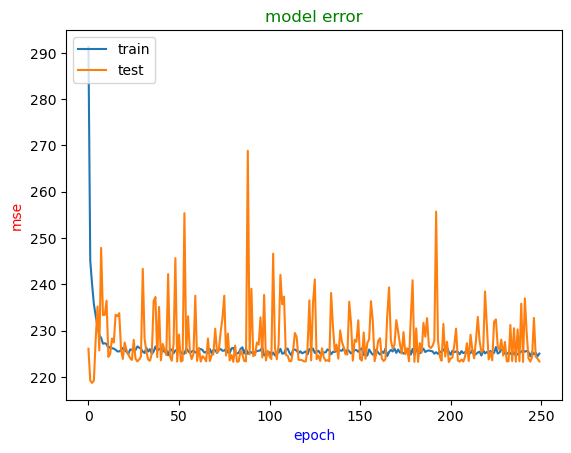

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model error', color = 'green')
plt.ylabel('mse', color=  'red')
plt.xlabel('epoch', color = 'blue')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [38]:
model1=Sequential()
model.add(Dense(3,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))

In [39]:
model1.compile(loss='mean_squared_error',optimizer='adam')

In [40]:
history=model.fit(x1,y1,validation_split=0.33,epochs=250,batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.6808 - val_loss: 229.4473
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.5657 - val_loss: 223.5849
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.8352 - val_loss: 223.1976
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.7469 - val_loss: 258.5282
Epoch 5/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.1099 - val_loss: 223.2538
Epoch 6/250
1008/1008 [==============================] - 2s 1ms/step - loss: 225.5995 - val_loss: 229.2025
Epoch 7/250
1008/1008 [==============================] - 1s 1ms/step - loss: 225.8574 - val_loss: 223.2061
Epoch 8/250
1008/1008 [==============================] - 2s 1ms/step - loss: 225.4862 - val_loss: 232.0853
Epoch 9/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.3715 - val_loss: 223.4182
Epoch 10/250
1008/1008 [=============

Epoch 77/250
1008/1008 [==============================] - 4s 4ms/step - loss: 224.9110 - val_loss: 223.3600
Epoch 78/250
1008/1008 [==============================] - 4s 4ms/step - loss: 225.5868 - val_loss: 230.3577
Epoch 79/250
1008/1008 [==============================] - 5s 5ms/step - loss: 225.2081 - val_loss: 232.0989
Epoch 80/250
1008/1008 [==============================] - 3s 3ms/step - loss: 225.2838 - val_loss: 241.0713
Epoch 81/250
1008/1008 [==============================] - 3s 3ms/step - loss: 224.4561 - val_loss: 229.7982
Epoch 82/250
1008/1008 [==============================] - 4s 4ms/step - loss: 225.4670 - val_loss: 223.2006
Epoch 83/250
1008/1008 [==============================] - 6s 5ms/step - loss: 225.2690 - val_loss: 240.6785
Epoch 84/250
1008/1008 [==============================] - 5s 4ms/step - loss: 224.5465 - val_loss: 223.6562
Epoch 85/250
1008/1008 [==============================] - 4s 4ms/step - loss: 224.7081 - val_loss: 226.3833
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 4s 4ms/step - loss: 224.6114 - val_loss: 235.4255
Epoch 153/250
1008/1008 [==============================] - 6s 6ms/step - loss: 224.4445 - val_loss: 227.9312
Epoch 154/250
1008/1008 [==============================] - 4s 4ms/step - loss: 224.9387 - val_loss: 223.6613
Epoch 155/250
1008/1008 [==============================] - 4s 4ms/step - loss: 224.9874 - val_loss: 223.2338
Epoch 156/250
1008/1008 [==============================] - 5s 5ms/step - loss: 224.5804 - val_loss: 223.2717
Epoch 157/250
1008/1008 [==============================] - 4s 4ms/step - loss: 224.1524 - val_loss: 226.6243
Epoch 158/250
1008/1008 [==============================] - 4s 4ms/step - loss: 224.9299 - val_loss: 224.3245
Epoch 159/250
1008/1008 [==============================] - 5s 4ms/step - loss: 224.6672 - val_loss: 224.8407
Epoch 160/250
1008/1008 [==============================] - 6s 6ms/step - loss: 224.2327 - val_loss: 223.3928
Epoch 161/250
1008/1008 [========

1008/1008 [==============================] - 4s 4ms/step - loss: 218.8162 - val_loss: 224.0278
Epoch 228/250
1008/1008 [==============================] - 6s 6ms/step - loss: 218.7060 - val_loss: 228.6649
Epoch 229/250
1008/1008 [==============================] - 6s 6ms/step - loss: 219.0296 - val_loss: 216.6617
Epoch 230/250
1008/1008 [==============================] - 4s 4ms/step - loss: 219.1235 - val_loss: 221.3175
Epoch 231/250
1008/1008 [==============================] - 5s 5ms/step - loss: 218.9774 - val_loss: 222.3185
Epoch 232/250
1008/1008 [==============================] - 4s 4ms/step - loss: 218.5925 - val_loss: 220.2083
Epoch 233/250
1008/1008 [==============================] - 4s 4ms/step - loss: 218.9226 - val_loss: 214.4490
Epoch 234/250
1008/1008 [==============================] - 4s 4ms/step - loss: 219.0420 - val_loss: 229.3433
Epoch 235/250
1008/1008 [==============================] - 6s 6ms/step - loss: 219.2165 - val_loss: 223.2990
Epoch 236/250
1008/1008 [========

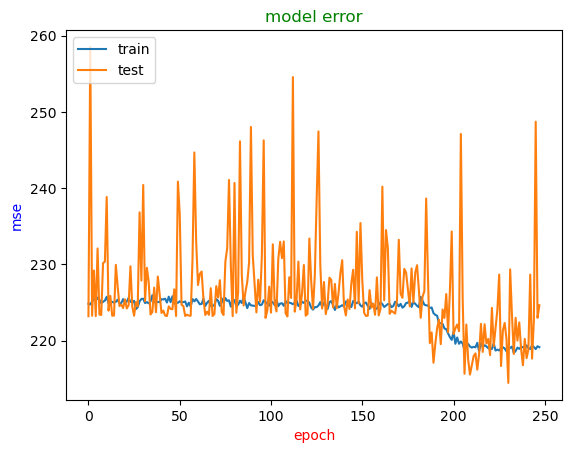

In [41]:
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.title('model error', color = 'green')
plt.ylabel('mse', color = 'blue')
plt.xlabel('epoch', color = 'red')
plt.legend(['train','test'],loc='upper left')
plt.show()

Conclusion:-

By using TensorFlow, Prediction of Turbine Energy Yield (TEY) we can see error is going to decrease it means we got better model.